# Single-cell RNA Sequencing of Lung Samples from COVID-19 Decedents and Control Individuals

**Data Source Acknowledgment:**

The dataset is sourced from [GSE171524](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE171524). This dataset comprises single-nuclei RNA sequencing data from 116,314 cells collected from 20 frozen lungs obtained from 19 individuals who died from COVID-19 and 7 control patients. It's essential to emphasize that this dataset is exclusively utilized for Python practice purposes within this repository.


This notebook will use only 1 sample ('GSM5226574_C51ctr_raw_counts.csv') practice data cleaning techniques and clustering.

In [2]:
#unzip .tar
#!tar -xf GSE171524_RAW.tar
#!gunzip GSM5226574_C51ctr_raw_counts.csv.gz

In [3]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Reading and creating AnnData object

In [4]:
#read a file using Scanpy
#it's necessary to transpose it because Scanpy requires genes as columns and cells as rows
adata = sc.read_csv('GSM5226574_C51ctr_raw_counts.csv').T
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [5]:
#first component = observation (df)
adata.obs

""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1
...
CGCCATTGTTTGCCGG-1_1
CACTGGGGTCTACGTA-1_1
CATACTTGTAGAGGAA-1_1
TTTGGTTTCCACGGAC-1_1


In [6]:
#second component = variables/genes (df)
adata.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


In [7]:
#third component = data matrix (numpy array)
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 2. Doublet removal (optional)
Two additional cells can be present in the same droplet. I will use scvi-tools, a package for probabilistic modeling of single-cell omics data, which is built on top of PyTorch and AnnData. First, I will create a dataframe for doublets, and then list the indices of these doublets. After that, I will remove these indices from the 'adata

In [8]:
#scvi will be used to predict whether a cell is doublet or not
import scvi

In [9]:
#narrow down the genes by filtering genes based on number of cells
sc.pp.filter_genes(adata ,min_cells=10)

In [14]:
adata

AnnData object with n_obs × n_vars = 6099 × 2000
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [13]:
#I will keep only 2000 top variable genes which can descibe the data
#Highly variable genes are genes whose expression levels vary significantly 
#across individual cells within a population. 

sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat_v3')

In [15]:
#predict the doublet
#use default model
scvi.model.SCVI.setup_anndata(adata)
#train the model
vae = scvi.model.SCVI(adata)
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Applications/anaconda3/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [14:32<00:00,  2.05s/it, v_num=1, train_loss_step=329, train_loss_epoch=324]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [14:32<00:00,  2.18s/it, v_num=1, train_loss_step=329, train_loss_epoch=324]


In [16]:
#after SCVI trained, the solo model which predict droublet will be trained by passing vae
# scvi.external.SOLO : Doublet detection in scRNA-seq
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Applications/anaconda3/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Applications/anaconda3/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 143/400:  36%|████████████████████████████████▉                                                           | 143/400 [00:57<01:43,  2.49it/s, v_num=1, train_loss_step=0.224, train_loss_epoch=0.301]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.280. Signaling Trainer to stop.


In [119]:
#Return doublet predictions
df_prediction = solo.predict()
df_prediction.to_csv('df_prediction.csv', index=True) 

In [121]:
#add prediction label (soft=False => return class labels as doublet pr singlet)
df_prediction['prediction'] = solo.predict(soft=False)
df_prediction

,doublet,singlet,prediction
TAGGTACCATGGCCAC-1_1,0.255841,-0.438761,doublet
ATTCACTGTAACAGGC-1_1,0.687152,-1.170110,doublet
TAACTTCCAACCACGC-1_1,-0.020706,-0.330602,doublet
TTGGGTACACGACAAG-1_1,0.950293,-1.178556,doublet
AGGCCACAGAGTCACG-1_1,0.573513,-0.904042,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1_1,-1.468524,1.969313,singlet
CACTGGGGTCTACGTA-1_1,-2.692539,2.721479,singlet
CATACTTGTAGAGGAA-1_1,-1.860980,2.147750,singlet
TTTGGTTTCCACGGAC-1_1,-2.403992,2.453446,singlet


In [122]:
df_prediction.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,978,978
singlet,5121,5121


In [123]:
#calculate diff between doublet score and singlet score
df_prediction['diff'] = df_prediction.doublet - df_prediction.singlet
df_prediction

,doublet,singlet,prediction,diff
TAGGTACCATGGCCAC-1_1,0.255841,-0.438761,doublet,0.694602
ATTCACTGTAACAGGC-1_1,0.687152,-1.170110,doublet,1.857262
TAACTTCCAACCACGC-1_1,-0.020706,-0.330602,doublet,0.309896
TTGGGTACACGACAAG-1_1,0.950293,-1.178556,doublet,2.128850
AGGCCACAGAGTCACG-1_1,0.573513,-0.904042,doublet,1.477555
...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,-1.468524,1.969313,singlet,-3.437837
CACTGGGGTCTACGTA-1_1,-2.692539,2.721479,singlet,-5.414019
CATACTTGTAGAGGAA-1_1,-1.860980,2.147750,singlet,-4.008730
TTTGGTTTCCACGGAC-1_1,-2.403992,2.453446,singlet,-4.857439


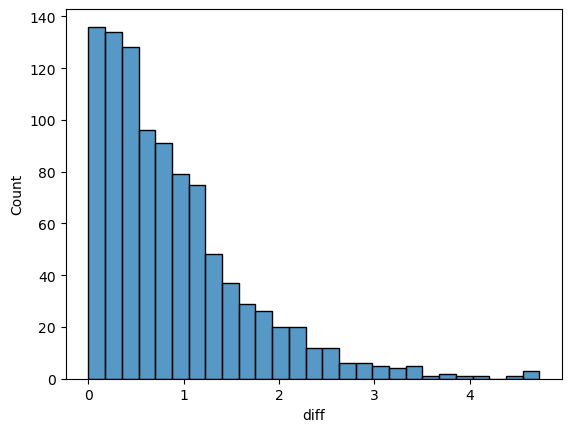

In [124]:
sns.histplot(df_prediction[df_prediction['prediction'] == 'doublet'], x='diff')
plt.show()

In [125]:
#filter out the doublet that has diff > 1

df_doublet = df_prediction[(df_prediction.prediction == 'doublet') & (df_prediction['diff'] > 1)]
df_doublet

,doublet,singlet,prediction,diff
ATTCACTGTAACAGGC-1_1,0.687152,-1.170110,doublet,1.857262
TTGGGTACACGACAAG-1_1,0.950293,-1.178556,doublet,2.128850
AGGCCACAGAGTCACG-1_1,0.573513,-0.904042,doublet,1.477555
CACTGAAGTCGAAGCA-1_1,0.513347,-0.879247,doublet,1.392594
ACTGATGTCTGCACCT-1_1,0.473030,-1.147980,doublet,1.621010
...,...,...,...,...
CCTCCTCGTGTGGACA-1_1,0.864986,-0.660994,doublet,1.525980
TAACTTCGTCATCGGC-1_1,0.827234,-0.224619,doublet,1.051853
TTGCTGCAGTGCGACA-1_1,0.502505,-0.718050,doublet,1.220555
ATCAGGTGTCGTCTCT-1_1,0.848040,-0.313997,doublet,1.162037


In [126]:
#adata is not orginal one
adata

AnnData object with n_obs × n_vars = 6099 × 34546
    obs: 'doublet'

In [127]:
#i need to reload adata again
adata = sc.read_csv('GSM5226574_C51ctr_raw_counts.csv').T
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [128]:
adata.obs['doublet'] = adata.obs.index.isin(df_doublet.index)
adata.obs

,doublet
TAGGTACCATGGCCAC-1_1,False
ATTCACTGTAACAGGC-1_1,True
TAACTTCCAACCACGC-1_1,False
TTGGGTACACGACAAG-1_1,True
AGGCCACAGAGTCACG-1_1,True
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [129]:
#filter all cells with doublet label out (keep only false)
# ~ means to keep FALSE
adata = adata[~adata.obs.doublet]
adata.obs

,doublet
TAGGTACCATGGCCAC-1_1,False
TAACTTCCAACCACGC-1_1,False
TTACCGCCACTCAGAT-1_1,False
TTGGTTTTCCTAGCTC-1_1,False
TGGGAAGTCAGTGATC-1_1,False
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


# 3. Preprocessing

In [136]:
#Mitochondrial genes
#create 'mt' column to anotate mt genes
adata.var['mt'] = adata.var.index.str.startswith('MT-')

/var/folders/ly/mwzzbn7j7yd69hdl9hq_23540000gn/T/ipykernel_1229/310233584.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var.index.str.startswith('MT-')


In [147]:
adata.var

,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [142]:
#get list of Ribosomal genes
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [143]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header=None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [145]:
ribo_genes[0].values

array(['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12',
       'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A',
       'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24',
       'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3',
       'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36',
       'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L',
       'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9',
       'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13',
       'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2',
       'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27',
       'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X',
       'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA',
       'RSL24D1', 'RSL24D1P11', 'UBA52'], dtype=object)

In [148]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [149]:
adata.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


In [151]:
adata

AnnData object with n_obs × n_vars = 5758 × 34546
    obs: 'doublet'
    var: 'mt', 'ribo'

In [155]:
#calculate QC metrics
sc.pp.calculate_qc_metrics(adata, qc_vars = ['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [160]:
#some genes are not detected in any cells => filter it
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL445072.1,False,False,0,0.000000,100.000000,0.0
AC108477.2,False,False,0,0.000000,100.000000,0.0
AC107050.1,False,False,0,0.000000,100.000000,0.0
AC108865.2,False,False,0,0.000000,100.000000,0.0
AC108046.1,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,4152,2.878777,27.891629,16576.0
MBNL1,False,False,4235,2.707885,26.450156,15592.0
NEAT1,False,False,4248,5.064432,26.224383,29161.0
ZBTB20,False,False,4385,2.457624,23.845085,14151.0


In [161]:
#Filter genes based on number of cells or counts
sc.pp.filter_genes(adata, min_cells=3)

In [162]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
UGT1A4,False,False,3,0.000521,99.947899,3.0,3
LCT,False,False,3,0.000521,99.947899,3.0,3
FOXN1,False,False,3,0.000521,99.947899,3.0,3
IL12B,False,False,3,0.000521,99.947899,3.0,3
AC019270.1,False,False,3,0.000521,99.947899,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,4152,2.878777,27.891629,16576.0,4152
MBNL1,False,False,4235,2.707885,26.450156,15592.0,4235
NEAT1,False,False,4248,5.064432,26.224383,29161.0,4248
ZBTB20,False,False,4385,2.457624,23.845085,14151.0,4385


In [164]:
#the minimum 401 genes are detected in the cell
adata.obs.sort_values('total_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CAGGGCTTCATGCGGC-1_1,False,330,401.0,7.0,1.745636,1.0,0.249377
TGGTACAGTTGGTGTT-1_1,False,323,401.0,0.0,0.000000,0.0,0.000000
GTCGTTCTCCAAGGGA-1_1,False,300,401.0,0.0,0.000000,0.0,0.000000
CTCAACCGTTTGGGAG-1_1,False,325,401.0,0.0,0.000000,0.0,0.000000
CGAGAAGGTGAACTAA-1_1,False,308,401.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...
TGGGAAGTCAGTGATC-1_1,False,4719,11238.0,92.0,0.818651,11.0,0.097882
TTACCGCCACTCAGAT-1_1,False,4144,11369.0,39.0,0.343038,5.0,0.043979
TTGGTTTTCCTAGCTC-1_1,False,3902,11472.0,463.0,4.035913,13.0,0.113319
TAACTTCCAACCACGC-1_1,False,5158,15645.0,221.0,1.412592,211.0,1.348674


In [ ]:
#the thresdhold of min_genes = 200 genes
#I will skip Filter cell outliers based on counts and numbers of genes expressed

#sc.pp.filter_cells(adata, min_genes=200)

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


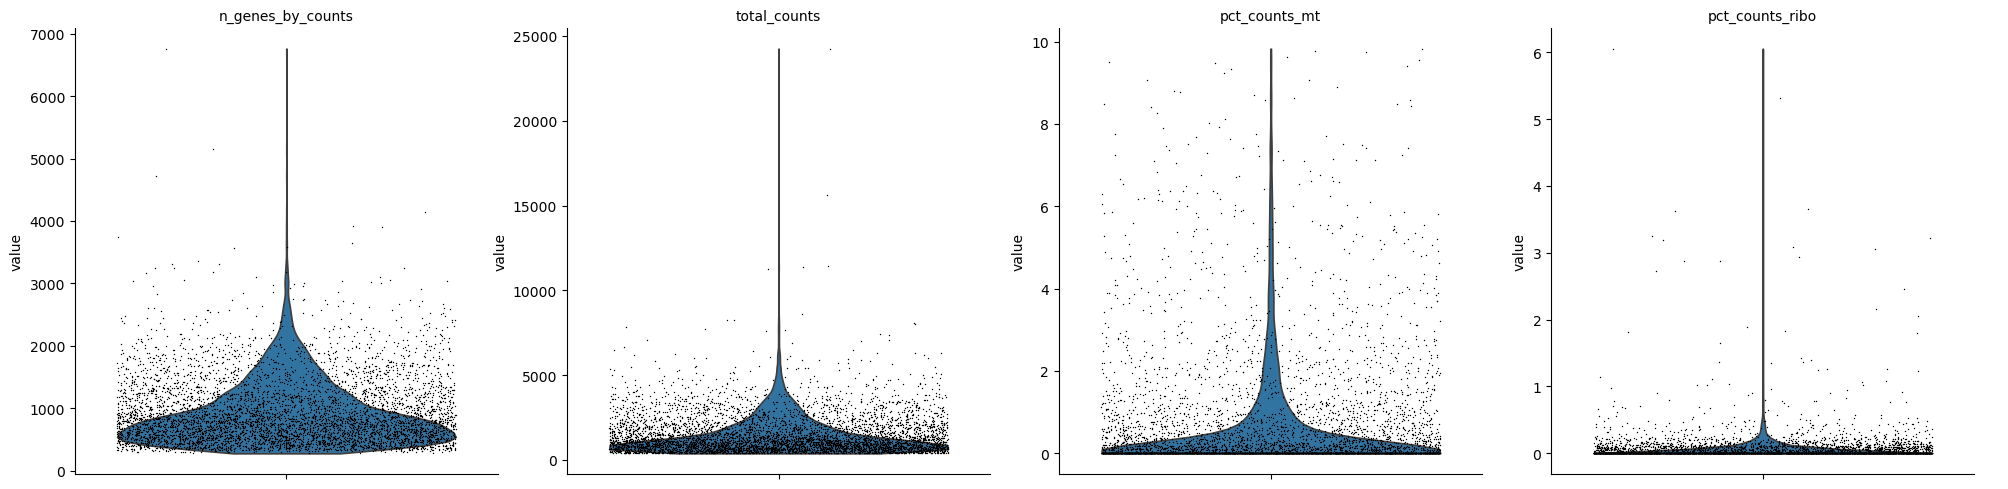

In [167]:
#plot qc metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], jitter=0.4, \
             multi_panel=True)

In [168]:
#use the qc metrics to get rid of OUTLIERS
#“n_genes_by_counts”; The number of genes with at least 1 count in a cell. Calculated for all cells.
#“total_counts”; Sum of counts for a gene.
#n_genes_by_counts and total_counts are highly correlated, only n_genes_by_counts will be used for filter
#pct_counts_mt is commonly set 5-20% 

In [172]:
#get percentile of 98% (upper limit) and 2% (lower limit) to filter outlier using  n_genes_by_counts
upper_limit = np.quantile(adata.obs.n_genes_by_counts.values, 0.98)
lower_limit = np.quantile(adata.obs.n_genes_by_counts.values, 0.02)
print(f'{upper_limit} to {lower_limit}')

2296.8799999999974 to 337.0


In [175]:
adata = adata[(adata.obs.n_genes_by_counts > lower_limit) & (adata.obs.n_genes_by_counts < upper_limit)]
adata.obs.sort_values('n_genes_by_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
ACTTTGTCATCTGGGC-1_1,False,338,519.0,0.0,0.000000,0.0,0.000000
ACTTCGCAGTAGTCAA-1_1,False,338,409.0,0.0,0.000000,0.0,0.000000
GTTGTGACAGTAACCT-1_1,False,338,417.0,0.0,0.000000,0.0,0.000000
TCATGTTTCGGTTCAA-1_1,False,338,442.0,0.0,0.000000,0.0,0.000000
TGACTCCTCATGCTAG-1_1,False,338,409.0,1.0,0.244499,0.0,0.000000
...,...,...,...,...,...,...,...
CTGCTCACAGGACTTT-1_1,False,2281,4420.0,325.0,7.352942,10.0,0.226244
CATAAGCTCCTCAGGG-1_1,False,2284,4389.0,94.0,2.141718,1.0,0.022784
TACTGCCGTTGCATTG-1_1,False,2285,3757.0,55.0,1.463934,5.0,0.133085
GGGTCACTCTATTCGT-1_1,False,2286,5056.0,0.0,0.000000,1.0,0.019778


In [178]:
#filter for mt genes
adata = adata[adata.obs.pct_counts_mt < 20]

In [179]:
#filter for ribo genes
adata = adata[adata.obs.pct_counts_ribo < 2]

In [180]:
adata

View of AnnData object with n_obs × n_vars = 5508 × 24257
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

# 4. Normalization
This step is important because lots of variation between cell types and also between cells or technical variations.
Normalize each cell by total counts over all genes, so that every cell has the same total count after normalization.

Taking the logarithm of the expression values helps to "compress" the high values and "stretch" the low values. This brings the distribution closer to a normal one, making statistical analyses downstream more reliable.

In [181]:
#each row = cell
adata.X

ArrayView([[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 1., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [182]:
#for each row (cell) in the expression matrix, it calculates the total expression value by adding up 
#the counts from all genes (columns) for that cell.
adata.X.sum(axis=1)

array([5433., 5250., 5050., ...,  403.,  410.,  410.], dtype=float32)

In [183]:
#normalize the count in each cell, so their total count are same value
#normalize every cell to 10000 UMI
sc.pp.normalize_total(adata, target_sum=1e4)

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [184]:
adata.X.sum(axis=1)

array([10000.   , 10000.001, 10000.   , ..., 10000.   , 10000.   ,
       10000.   ], dtype=float32)

In [185]:
#Logarithmize the data matrix (change to log count)
sc.pp.log1p(adata)

In [186]:
#it is comparable
adata.X.sum(axis=1)

array([3285.3794, 2858.1602, 3197.6335, ..., 1156.7786, 1191.2706,
       1162.8785], dtype=float32)

In [187]:
#save raw data before filtering
adata.raw = adata

# 5. Clustering

In [189]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [190]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,7,0.001216,99.878430,7.0,7,False,0.006646,2.290941,-0.075218
AL627309.5,False,False,29,0.005036,99.496353,29.0,29,False,0.025753,2.105389,-0.647614
AL627309.4,False,False,3,0.000521,99.947899,3.0,3,False,0.002522,1.702937,-1.889105
LINC01409,False,False,242,0.045502,95.797152,262.0,242,False,0.274629,2.320995,0.017493
FAM87B,False,False,6,0.001042,99.895797,6.0,6,False,0.007229,1.947425,-1.134902
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,122,0.021883,97.881209,126.0,122,False,0.153821,2.380204,0.200142
AL592183.1,False,False,893,0.184265,84.491143,1061.0,893,False,0.855272,2.427264,-0.562363
AC240274.1,False,False,147,0.026224,97.447030,151.0,147,False,0.149542,2.254325,-0.188173
AC007325.4,False,False,4,0.000695,99.930531,4.0,4,False,0.003030,1.579803,-2.268950


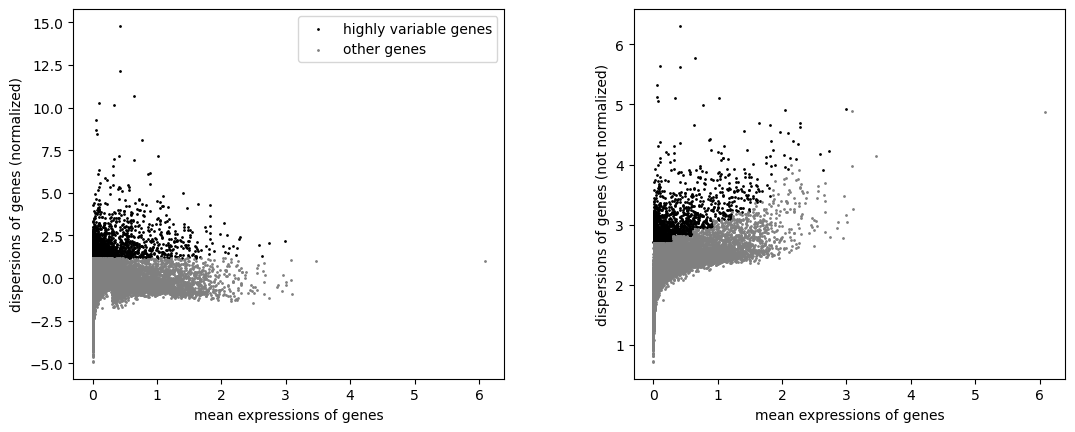

In [191]:
#Plot dispersions or normalized variance versus means for genes.
#gene with high dispersion = highly variable genes
#this is the way to reduce the number of dimensions of the dataset
sc.pl.highly_variable_genes(adata)

In [199]:
#get only highly_varible genes = 2000 genes
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 5508 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [200]:
#Regress out (mostly) unwanted sources of variation.
#the differences that arise due to 'total_counts','pct_counts_mt','pct_counts_ribo' are regressed.
#this will get rid of variations in the data that are due to processing and sample quality seq artifact
sc.pp.regress_out(adata, ['total_counts','pct_counts_mt','pct_counts_ribo'])

In [201]:
#Scale data to unit variance of that genes and zero mean.
sc.pp.scale(adata, max_value=10)

In [203]:
#PCA: scikit-learn PCA is used, will give 'arpack'
#this will further reduces dimension from 2000 to about 30-50 pca
sc.pp.pca(adata,svd_solver='arpack')

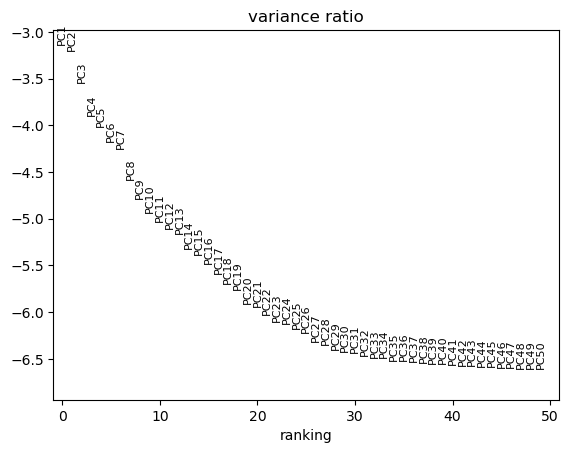

In [208]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [210]:
#the elbow of the plot will use (where you cannot see big difference)~ 30
#calculate the neighbours of the cells using 30pc
#Computes the nearest neighbors distance matrix and a neighborhood graph of observations
sc.pp.neighbors(adata, n_pcs=30)

In [211]:
adata

AnnData object with n_obs × n_vars = 5508 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [219]:
#5508x5508 matrix = cells by cells matrix
#cells that connected will get the values
#these matrix will used for clusetering
adata.obsp['distances'].toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.80401254, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.80401254, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [220]:
adata.obsp['connectivities'].toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [221]:
#the 30 dimensions (30 pc) will reduced to 2 dimensions
sc.tl.umap(adata)

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


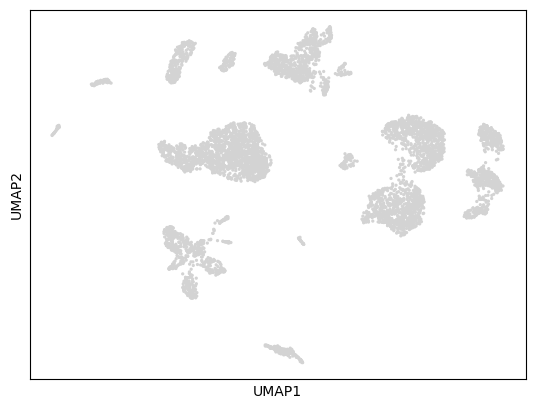

In [222]:
sc.pl.umap(adata)

In [224]:
#assign the cluster using leidenald algorithm
#resolution closer 1 = more clusters
#resolution closer 0 = fewer cluster
sc.tl.leiden(adata, resolution=0.5)

In [225]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
CCTCAACCATACAGGG-1_1,False,2276,5434.0,38.0,0.699301,0.0,0.000000,12
ATACTTCCAAGGTCTT-1_1,False,2122,5252.0,1.0,0.019040,4.0,0.076161,2
GGGTCACTCTATTCGT-1_1,False,2286,5056.0,0.0,0.000000,1.0,0.019778,2
AGACACTTCATACAGC-1_1,False,2223,4943.0,2.0,0.040461,0.0,0.000000,1
GATGATCCACAACCGC-1_1,False,2263,4938.0,2.0,0.040502,2.0,0.040502,2
...,...,...,...,...,...,...,...,...
GTACAGTCACGTATAC-1_1,False,339,427.0,6.0,1.405152,0.0,0.000000,10
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000,6
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000,0


/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


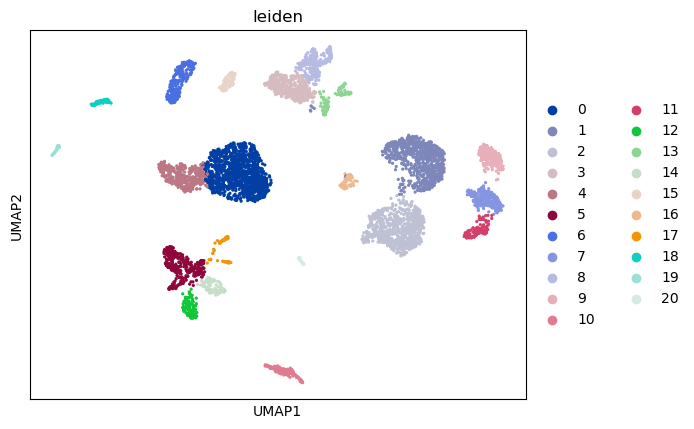

In [227]:
sc.pl.umap(adata, color='leiden')

**Integration**
if there are more than 1 sample, it need to concat data of all files together (use the scipt which contained all above codes). Actually we should transform dense matrix to sparse matrix to save memory before we concat all files (do it when we load them). But i will practice to convert it even i'm working on 1 sample.

In [242]:
adata.X

array([[ 0.07564375, -0.01087854, -0.7102401 , ...,  0.7299724 ,
        -0.91042274,  1.126799  ],
       [ 0.04314532, -0.00496614, -0.59466404, ..., -0.676789  ,
        -0.60361224, -0.31703845],
       [ 0.0521923 , -0.01062166, -0.57890594, ..., -0.60145116,
        -0.5194946 , -0.2802031 ],
       ...,
       [-0.06947231, -0.03692959,  0.0468879 , ..., -0.0903862 ,
         0.03341283, -0.1750512 ],
       [-0.06368177, -0.03733666, -0.00681102, ...,  3.5067422 ,
        -0.22241713,  3.5173779 ],
       [-0.06925432, -0.03688715,  0.04580421, ..., -0.09124091,
         0.03249335, -0.17522098]], dtype=float32)

In [243]:
#convert X to sparse matrix to reduce the size of the file 
from scipy.sparse import csr_matrix

In [244]:
adata.X = csr_matrix(adata.X)

In [245]:
adata.X

<5508x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 11016000 stored elements in Compressed Sparse Row format>

In [247]:
#if you wanna save it as file
#adata = write_h5ad('filename.h5ad')

# 6. Find marker and label cell type

In [248]:
#Rank genes for characterizing groups.
sc.tl.rank_genes_groups(adata, 'leiden')

/Applications/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Applications/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Applications/anaconda3/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly 

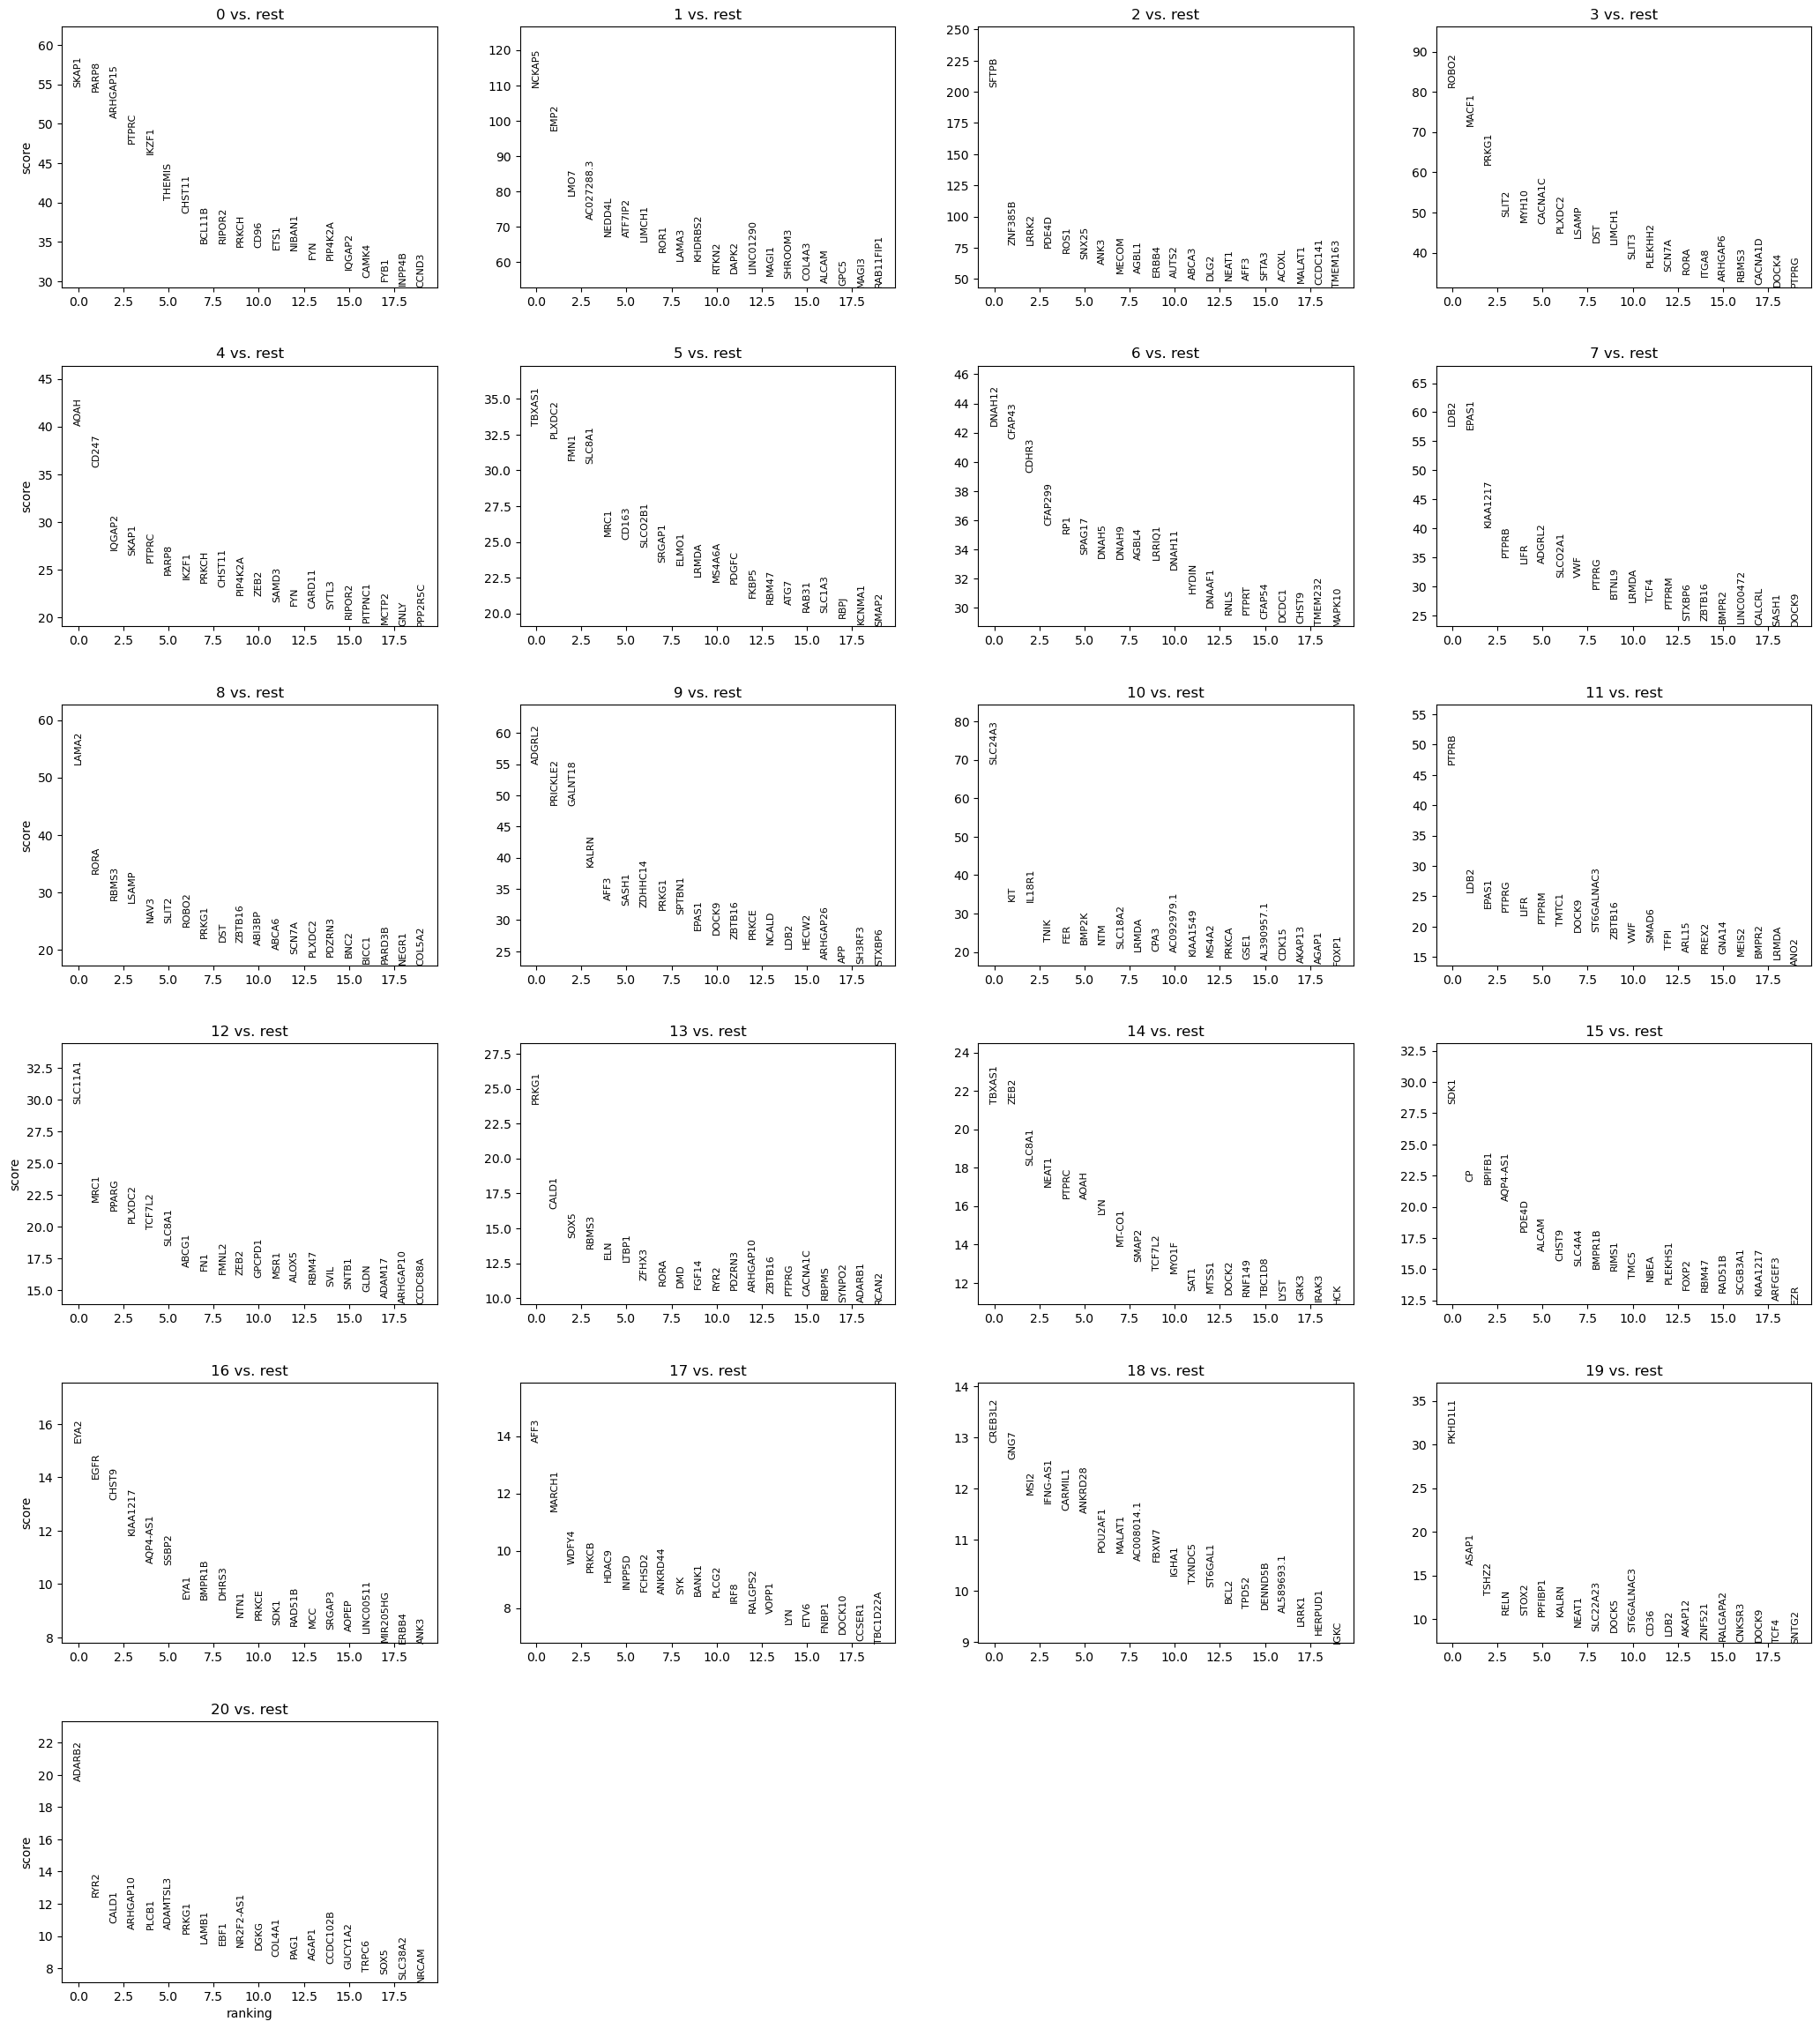

In [249]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [250]:
#All groups are returned if groups is None.
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,SKAP1,54.687660,5.357731,0.000000e+00,0.000000e+00
1,0,PARP8,54.023983,4.665153,0.000000e+00,0.000000e+00
2,0,ARHGAP15,50.675266,4.466295,0.000000e+00,0.000000e+00
3,0,PTPRC,47.490986,4.321693,1.105257e-305,2.946177e-303
4,0,IKZF1,46.171635,4.559054,3.794747e-287,8.523071e-285
...,...,...,...,...,...,...
485389,20,COL18A1,2.283177,2.643685,3.155155e-02,4.845803e-02
485390,20,ARHGEF17,2.276492,2.965842,3.200916e-02,4.906144e-02
485391,20,ZNF697,2.274908,5.008710,3.212988e-02,4.922468e-02
485392,20,KIF1B,2.272514,1.541862,3.224516e-02,4.938571e-02


/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


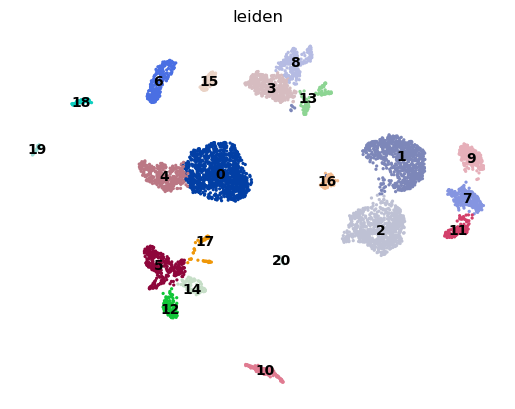

In [252]:
sc.pl.umap(adata, color='leiden', frameon=False, legend_loc='on data')

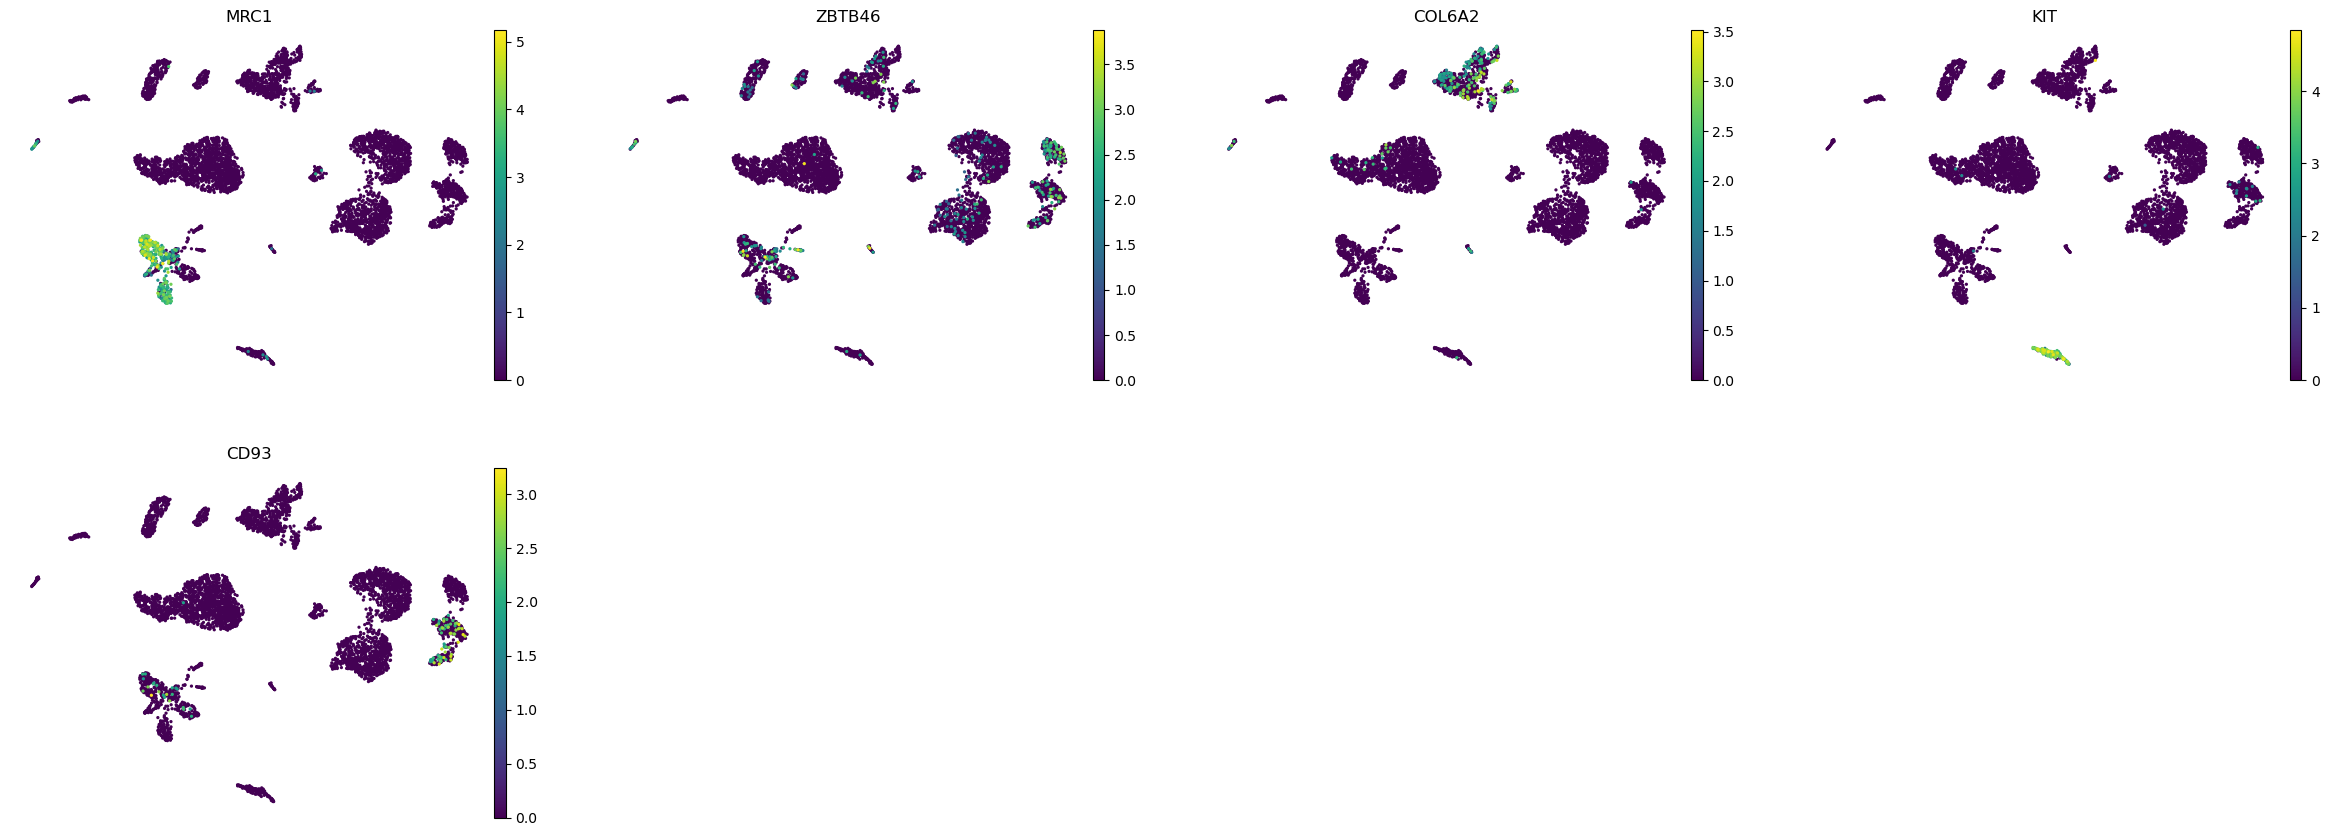

In [305]:
#this time will do manual label the cluster using the makers for cells eg. blood cells
#MRC1 => Alveolar macrophages
#ZBTB46=> dendritic cells
#COL6A2 => fibroblast
#KIT => mast cells
#CD93 => endothelia cells
#see more markers = #https://panglaodb.se/

sc.pl.umap(adata, color=['MRC1', 'ZBTB46', 'COL6A2', 'KIT', 'CD93'], frameon=False)

In [298]:
markers[markers.names == 'MRC1']

,group,names,scores,logfoldchanges,pvals,pvals_adj
121289,5,MRC1,25.402325,7.315554,1.612038e-77,8.445616e-76
291085,12,MRC1,21.943817,6.371253,4.238915e-42,1.006099e-40
461002,19,MRC1,3.505648,3.174527,1.496743e-03,3.211259e-03


In [289]:
markers[markers.names == 'ZBTB46']

,group,names,scores,logfoldchanges,pvals,pvals_adj
122024,5,ZBTB46,4.389833,1.802699,1.548027e-05,6.898539e-05
170514,7,ZBTB46,3.177321,1.502938,1.674276e-03,4.154772e-03
218569,9,ZBTB46,6.274451,2.928472,1.989382e-09,1.010395e-08
412608,17,ZBTB46,3.172041,2.547908,2.320152e-03,5.724160e-03
461112,19,ZBTB46,2.536231,2.785002,1.683356e-02,2.992756e-02


In [299]:
markers[markers.names == 'COL6A2']

,group,names,scores,logfoldchanges,pvals,pvals_adj
73105,3,COL6A2,8.477725,3.486885,4.211154e-16,3.805886e-15
194263,8,COL6A2,7.506474,3.633420,1.314182e-12,1.228444e-11
315450,13,COL6A2,5.272948,3.685722,7.495701e-07,3.545003e-06


In [284]:
markers[markers.names == 'KIT']

,group,names,scores,logfoldchanges,pvals,pvals_adj
242571,10,KIT,33.251854,11.480878,3.933087e-71,2.657518e-69


In [306]:
markers[markers.names == 'CD93']

,group,names,scores,logfoldchanges,pvals,pvals_adj
122462,5,CD93,3.241106,2.150321,1.318232e-03,4.193069e-03
170116,7,CD93,5.922579,4.322315,1.079123e-08,5.163992e-08
267009,11,CD93,5.543233,4.894362,2.081484e-07,9.650337e-07


In [286]:
#example how to label the cell types
#first create dictionary of cluster
for x in range(0,21):
    print(f" '{x}':'',")

 '0':'',
 '1':'',
 '2':'',
 '3':'',
 '4':'',
 '5':'',
 '6':'',
 '7':'',
 '8':'',
 '9':'',
 '10':'',
 '11':'',
 '12':'',
 '13':'',
 '14':'',
 '15':'',
 '16':'',
 '17':'',
 '18':'',
 '19':'',
 '20':'',


In [301]:
cell_type = {'0':'',
 '1':'',
 '2':'',
 '3':'Fibroblast',
 '4':'',
 '5':'Macrophages',
 '6':'',
 '7':'Endothelia cells',
 '8':'Fibroblast',
 '9':'',
 '10':'mast cells',
 '11':'Endothelia cells',
 '12':'Macrophages',
 '13':'Fibroblast',
 '14':'',
 '15':'',
 '16':'',
 '17':'',
 '18':'',
 '19':'',
 '20':''}

In [311]:
#suppose that we finished all labels:
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden,cell_type
CCTCAACCATACAGGG-1_1,False,2276,5434.0,38.0,0.699301,0.0,0.000000,12,Macrophages
ATACTTCCAAGGTCTT-1_1,False,2122,5252.0,1.0,0.019040,4.0,0.076161,2,
GGGTCACTCTATTCGT-1_1,False,2286,5056.0,0.0,0.000000,1.0,0.019778,2,
AGACACTTCATACAGC-1_1,False,2223,4943.0,2.0,0.040461,0.0,0.000000,1,
GATGATCCACAACCGC-1_1,False,2263,4938.0,2.0,0.040502,2.0,0.040502,2,
...,...,...,...,...,...,...,...,...,...
GTACAGTCACGTATAC-1_1,False,339,427.0,6.0,1.405152,0.0,0.000000,10,mast cells
CGCCATTGTTTGCCGG-1_1,False,355,410.0,3.0,0.731707,0.0,0.000000,6,
CACTGGGGTCTACGTA-1_1,False,346,403.0,0.0,0.000000,0.0,0.000000,1,
CATACTTGTAGAGGAA-1_1,False,360,410.0,2.0,0.487805,0.0,0.000000,0,


/Applications/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


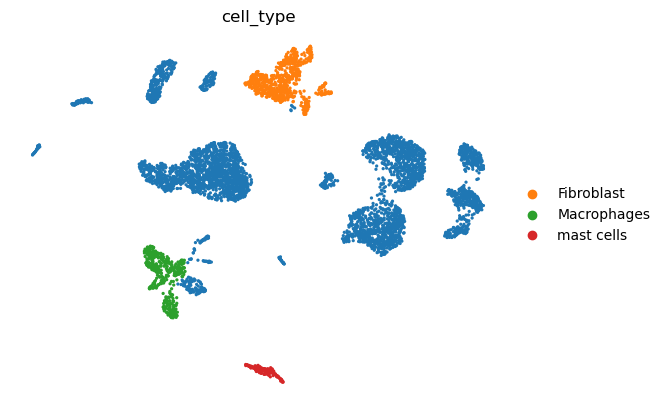

In [314]:
sc.pl.umap(adata, color = ['cell_type'], frameon = False)

In [315]:
adata

AnnData object with n_obs × n_vars = 5508 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell_type'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [316]:
#we can save markers in uns
adata.uns['markers'] = markers

In [317]:
adata

AnnData object with n_obs × n_vars = 5508 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell_type'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'cell_type_colors', 'markers'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'